# IPSL_10_years_trend_example with xarray and ProPlot

In [114]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot
from scipy import stats

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.7.5 (default, Oct 25 2019, 15:51:11) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 100 GB / percent used: 19.9 %


### Get the IPSL data (all members) from 2005 to 2014 for NH

In [143]:
def get_data():
    n_realization = 32 # 32
    list_da = []
    
    for i in range(1,n_realization+1):
        
        path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r'+str(i)+'i1p1f1/LImon/snc/gr/latest/'\
               'snc_LImon_IPSL-CM6A-LR_historical_r'+str(i)+'i1p1f1_gr_185001-201412.nc'
        
        list_da.append(xr.open_dataset(path).snc.sel(time=slice('2005','2014'), lat=slice(25, 90)))

    snc = xr.concat(
        list_da, 
        pd.Index(['r'+str(i)+'i1p1f1' for i in range(1,n_realization+1)], name='realization')
    )
    
    return snc

In [144]:
ens_snow = get_data()
u.check_virtual_memory()
ens_snow

Virtual memory usage - total: 126 GB / available: 91 GB / percent used: 27.2 %


<xarray.DataArray 'snc' (realization: 32, time: 120, lat: 52, lon: 144)>
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 2.0167974e-04, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00,

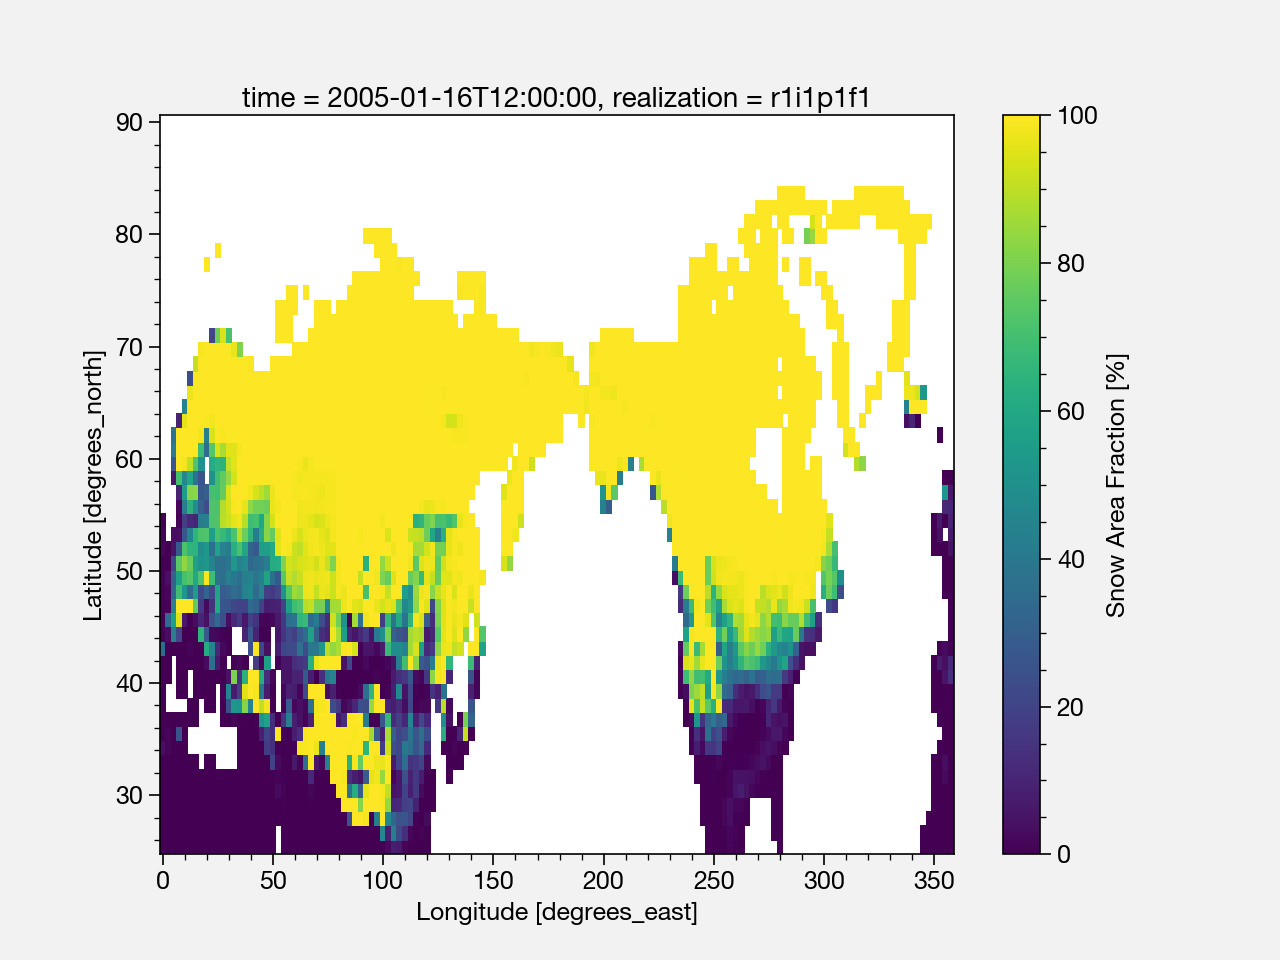

In [145]:
ens_snow[0,0].plot()

### Compute the MAM climatology

In [146]:
MAM_ens_cmip6 = u.custom_season_clim(ens_snow, calendar=ens_snow.time.encoding['calendar'], season='MAM')
MAM_ens_cmip6

<xarray.DataArray (realization: 32, lat: 52, lon: 144)>
array([[[0.00000000e+00, 0.00000000e+00, 1.73452762e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.21578893e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.81898429e-06, 1.24925159e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.

### Compute the ensemble mean

In [147]:
ens_avg_snow = MAM_ens_cmip6.mean('realization', skipna=False, keep_attrs=True)
ens_avg_snow

<xarray.DataArray (lat: 52, lon: 144)>
array([[0.00000000e+00, 0.00000000e+00, 5.46057561e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.80578652e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.36646879e-08, 1.60299952e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * lat      (lat) float32 25.352112 26.619719 27.887323 ... 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fracti

## Plot

In [7]:
# Add cyclic point -> don't need to do it with ProPlot -> globe=True
# ens_avg_snow_cyclic = u.cyclic_dataarray(ens_avg_snow)
# ens_avg_snow_cyclic

/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
    return np.nanmean(a, axis=axis, dtype=dtype)



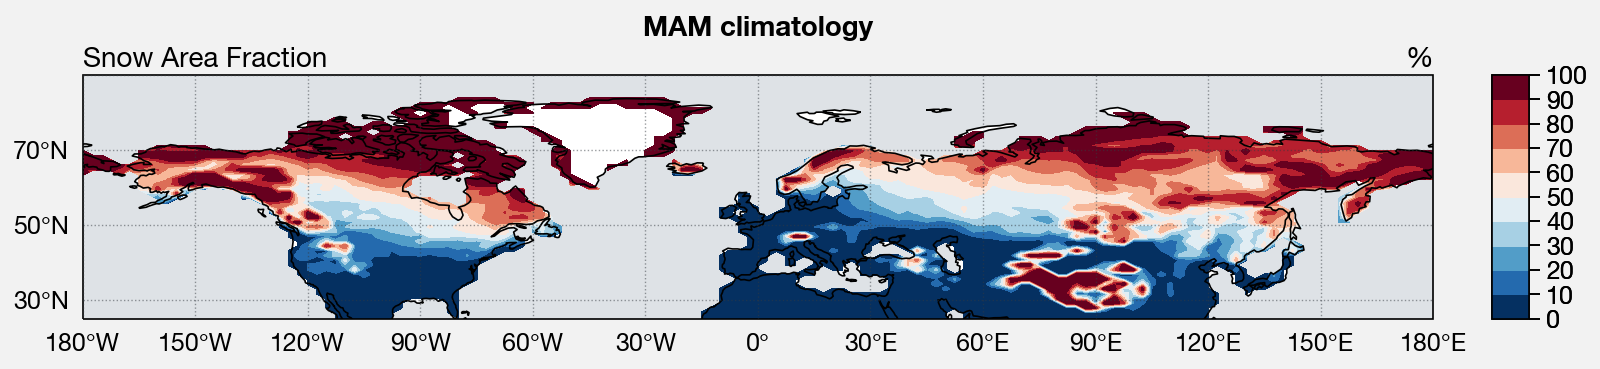

In [150]:
f, axs = plot.subplots(proj='cyl', width=8)

m = axs[0].contourf(ens_avg_snow, cmap='BuRd', globe=True)

f.colorbar(m)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', latlim=(25,90),
    suptitle=str(ens_avg_snow.season.values) + ' climatology',
    ltitle=ens_avg_snow.long_name, rtitle=ens_avg_snow.units, title=''
)

### Extract March and April

In [202]:
# march_snow = ens_snow.where(ens_snow['time.month']==3, drop=True)
# april_snow = ens_snow.where(ens_snow['time.month']==4, drop=True)
# april_snow

march_april_snow = u.year_mean(ens_snow, calendar=ens_snow.time.encoding['calendar'], season='MA')
march_april_snow

<xarray.DataArray (realization: 32, year: 10, lat: 52, lon: 144)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
 

### Spatial average

In [178]:
march_april_snow_bis = u.spatial_average(march_april_snow)
march_april_snow_bis

<xarray.DataArray (realization: 32, time: 10)>
array([[38.983635, 35.02569 , 36.48134 , 37.851974, 37.05184 , 37.575897,
        39.025974, 37.610046, 37.596485, 35.24856 ],
       [39.334618, 38.893593, 34.578606, 41.177902, 39.21408 , 39.623695,
        37.68734 , 38.523094, 38.17711 , 39.198616],
       [40.18155 , 35.9786  , 37.762848, 38.26496 , 34.987793, 37.68542 ,
        39.096992, 37.34217 , 35.664017, 39.18836 ],
       [37.333633, 36.227554, 38.951126, 35.34456 , 39.87925 , 36.740105,
        38.164   , 37.249336, 39.15766 , 36.69641 ],
       [37.08666 , 40.40938 , 39.418877, 40.353783, 39.78893 , 37.007854,
        37.69676 , 36.61858 , 38.531696, 35.42224 ],
       [36.619698, 36.318203, 35.68368 , 37.130943, 39.087578, 36.69835 ,
        40.364403, 36.60041 , 36.519386, 34.87576 ],
       [35.813866, 38.962837, 37.11692 , 37.31238 , 35.265907, 34.57607 ,
        37.627804, 38.331696, 38.578606, 38.002625],
       [39.6004  , 37.388336, 38.274044, 37.36249 , 40.082596, 3

### Compute the trends

In [181]:
x = march_april_snow_bis[0].year.values
linregress_list = []
for i in range(march_snow_bis.realization.size):
    linregress_list.append(
        stats.linregress(x, march_april_snow_bis[i].values)
    )

### Plot the trends

Text(0.5, 1.0, '')

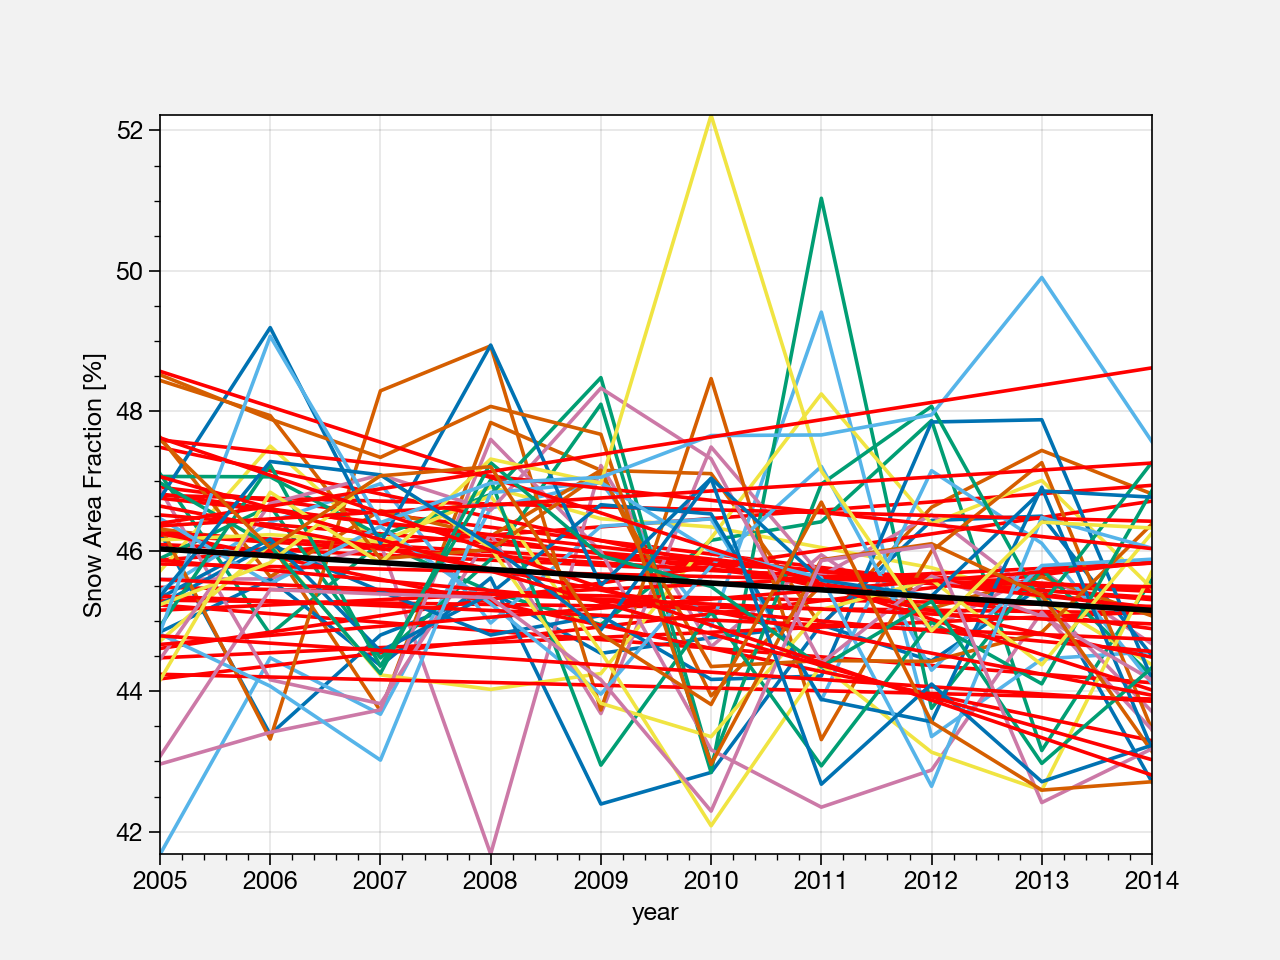

In [200]:

trends = []

plt.figure()

for i in range(march_snow_bis.realization.size):
    
    # plot timeseries
    march_april_snow_bis[i].plot(label=march_april_snow_bis[i].realization.values)
    
    # plot trends
    trends.append(linregress_list[i].intercept + linregress_list[i].slope*x)
    plt.plot(x, trends[i], color='r')
    
# plot the mean of the trends
plt.plot(x, np.mean(trends, axis=0), color='black', linewidth=2)

plt.title('')
# plt.legend()
